# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?


1.   m(a+bX)=m(a)+m(bX)=a+m(bX)=a+b*m(X)
2.   cov(X,a+bY)=cov(X,a)+cov(X,bY)=0+b*cov(X,Y)=b*cov(X,Y)
3.   cov(a+bX,a+bX)=cov(a,a)+cov(a,bX)+cov(bX,a)+cov(bX,bX)=0+0+0+b * b * cov(X,X)=b^2 * cov(X,X)=b^2 * s^2

$$
\text{cov}(X,X) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(x_i - m(x))$$
$$
\text{cov}(X,X) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2 = s^2
$$
4.  A non-decreasing transformation preserves the order of values from least to greatest since the transformation will be applied consistently across all values, so a non-decreasing transformation of the median is the median of the transformed variable. This applies to the quantile, IQR and the range.
5. It's not always true. Since the mean is the sum of all values divided by the number of values, it's highly influenced by changes the changes of each value and the distance between each value. For example, in the set X={1,2,3,4}, M(X)=2.5. If g(x)=x^2, then g(X)={1,4,9,16}. g(m(X))=6.25 and m(g(X))=7.5. 6.25 doesn't equal 7.5, so m(g(X))=g(m(X)) isn't always true.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as lib
import seaborn as sns

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

<Axes: xlabel='Foreign Gift Amount', ylabel='Count'>

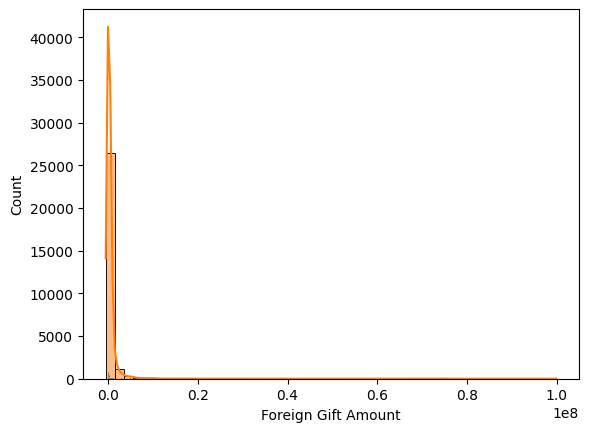

In [22]:
url='https://raw.githubusercontent.com/jac7az/EDA/refs/heads/main/assignment/data/ForeignGifts_edu.csv'
gift=pd.read_csv(url)
gift

sns.histplot(gift,x="Foreign Gift Amount",bins=5000)
#It seems laaaaaarge majority of gifts are only a couple thousand dollars or less, which is still a lot of money. However, the gift money goes all the
  #the way up to $1mil.

gift['Gift Type'].value_counts(normalize=True)
#61% of gifts are a contract, 39% are monetary gifts and 0.39% are entire real estate gifts

sns.histplot(gift,x="Foreign Gift Amount",bins=50,kde=True)

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

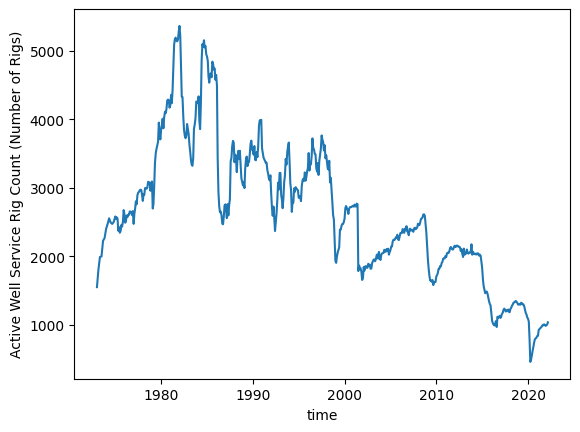

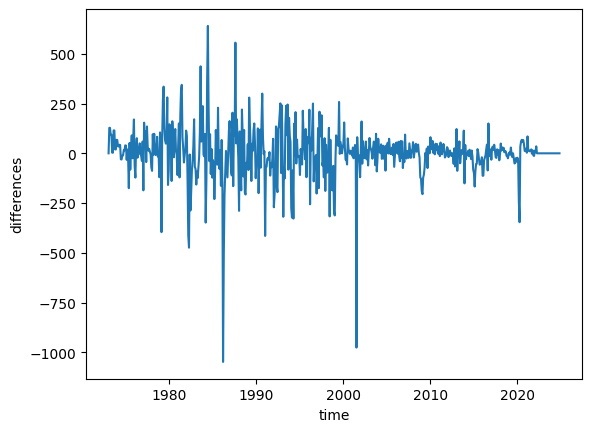

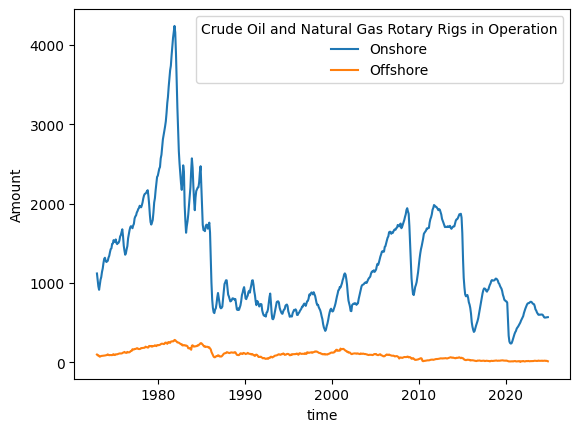

,time,Crude Oil and Natural Gas Rotary Rigs in Operation,Amount
0,1973-01-01,Onshore,1120
1,1973-02-01,Onshore,1037
2,1973-03-01,Onshore,959
3,1973-04-01,Onshore,914
4,1973-05-01,Onshore,974
...,...,...,...
1241,2024-07-01,Offshore,22
1242,2024-08-01,Offshore,19
1243,2024-09-01,Offshore,20
1244,2024-10-01,Offshore,18


In [ ]:
url2='https://raw.githubusercontent.com/jac7az/EDA/refs/heads/main/assignment/data/drilling_rigs.csv'
drill=pd.read_csv(url2)
drill['Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)'].unique()

#There are 623 observations and 10 variables. Most of the Crude Oil variables have to be coerced into numerical values since many entries are not available.
  #First, the null observations can be dropped and the entries with "Not Available" must be eliminated, then the rest can be coerced into integers.
  #I wouldn't substitute the values with a mean or median because not only is there a large range of values for every variable, there are also many observations that have many unknown entries in multiple variables.
  #Dropping them would be easier to deal with.

drill['time']=pd.to_datetime(drill['Month'],format='mixed')
drill['Active Well Service Rig Count (Number of Rigs)']=drill['Active Well Service Rig Count (Number of Rigs)'].replace("Not Available",np.nan)
drill['Active Well Service Rig Count (Number of Rigs)'].dropna()

drill['Active Well Service Rig Count (Number of Rigs)']=pd.to_numeric(drill['Active Well Service Rig Count (Number of Rigs)'],errors='coerce')
sns.lineplot(drill,x='time',y='Active Well Service Rig Count (Number of Rigs)')
lib.pyplot.xlabel="Years"
lib.pyplot.show()
#The number of active well service rigs dramatically increasing around 1980-1985 but sharply and gradually dropped starting 1990.
  #Looks like it was somewhat of a short-lived endeavor.

drill['differences']=drill['Active Well Service Rig Count (Number of Rigs)'].diff()
drill['differences']=drill['differences'].fillna(0,)
sns.lineplot(drill,x='time',y='differences')
lib.pyplot.xlabel="Years"
lib.pyplot.ylabel="Differences in Active Well Service Rig Count (Number of Rigs)"
lib.pyplot.show()
#The decrease and increase of well service rigs actually fluctuate pretty consistently between increasing and decreasing until about 2002,
  #where the change in well rigs decrease significantly. However, around 1987 and 2001, there is a huge decrease in number of well rigs.
  #On the other hand, there's never as dramatic of an increase in rigs.

drill_melted=drill.melt(id_vars='time',var_name="Crude Oil and Natural Gas Rotary Rigs in Operation",value_name="Amount",value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)','Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'])
drill_melted["Crude Oil and Natural Gas Rotary Rigs in Operation"]=drill_melted["Crude Oil and Natural Gas Rotary Rigs in Operation"].replace('Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)','Onshore')
drill_melted["Crude Oil and Natural Gas Rotary Rigs in Operation"]=drill_melted["Crude Oil and Natural Gas Rotary Rigs in Operation"].replace('Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)','Offshore')
sns.lineplot(data=drill_melted,x="time",y="Amount",hue="Crude Oil and Natural Gas Rotary Rigs in Operation")
lib.pyplot.show()